<a href="https://colab.research.google.com/github/Tahira148/Exploratory-Data-Analysis-with-Pandas/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Titanic Dataset Exploratory Data Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer in Colab
%matplotlib inline
sns.set_context("talk")


In [18]:
# Task 1: Load the Titanic dataset

df = pd.read_csv("Titanic-Dataset.csv")
print("Loaded dataset with shape:", df.shape)



Loaded dataset with shape: (891, 12)


In [19]:
# Task 2: Inspect the data

# Display the first 5 rows
print("First 5 rows:")
display(df.head())

# Display the last 5 rows
print("Last 5 rows:")
display(df.tail())

# Display dtypes
print("\nData Types:")
print(df.dtypes)

# Summary statistics for numerical columns
print("\nSummary Statistics (numerical):")
display(df.describe(include=[np.number]).round(3))

# Also show summary for non-numeric columns
print("\nSummary Statistics (object / categorical):")
display(df.describe(include=['object']))


First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Last 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q



Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics (numerical):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329



Summary Statistics (object / categorical):


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [22]:
# Task 3: Clean and preprocess the data

# Create a new categorical feature 'PclassCategory' from 'Pclass'
pclass_map = {1: 'First', 2: 'Second', 3: 'Third'}
df['PclassCategory'] = df['Pclass'].map(pclass_map).astype('category')

# Create a new categorical feature 'CabinCategory' from 'Cabin'
# We'll use the first letter of cabin (deck) where available; otherwise 'Unknown'
def cabin_category(c):
    if pd.isna(c) or str(c).strip()=='':
        return 'Unknown'
    # cabin may be like "C85" or "C23 C25 C27"; take first letter
    return str(c).strip()[0]
df['CabinCategory'] = df['Cabin'].apply(cabin_category).astype('category')

# Handle missing values in the 'Age' column (use mean age)
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

# Create a 'Family' feature by combining 'SibSp' and 'Parch' (family size including self)
df['Family'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger themselves

# Quick check
display(df[['Pclass','PclassCategory','Cabin','CabinCategory','Age','Family']].head())
print("Number of missing Age after fill:", df['Age'].isna().sum())


,Pclass,PclassCategory,Cabin,CabinCategory,Age,Family
0,3,Third,NaN,Unknown,22.0,2
1,1,First,C85,C,38.0,2
2,3,Third,NaN,Unknown,26.0,1
3,1,First,C123,C,35.0,2
4,3,Third,NaN,Unknown,35.0,1


Number of missing Age after fill: 0


- **Data completeness and preprocessing**

    - `Age` had missing values; we filled them with the mean age. That is simple and reasonable for demonstration, but depending on the skew and missingness pattern, you might prefer median or model-based imputation in production.
  - `Cabin` contains many missing values; extracting the first letter as `CabinCategory` converts cabins to deck-like groups, but "Unknown" remains common.



In [23]:
# Task 4: Identify specific data points

# Find passengers with the highest fare
max_fare = df['Fare'].max()
highest_fare_passengers = df[df['Fare'] == max_fare].sort_values('Fare', ascending=False)
print(f"Highest fare value: {max_fare}")
display(highest_fare_passengers[['Name','Ticket','Fare','PclassCategory','Survived','Age','Family']])

# Find passengers with the largest family size
max_family = df['Family'].max()
largest_family_passengers = df[df['Family'] == max_family].sort_values('Family', ascending=False)
print(f"Largest family size: {max_family}")
display(largest_family_passengers[['Name','SibSp','Parch','Family','PclassCategory','Survived']])


Highest fare value: 512.3292


,Name,Ticket,Fare,PclassCategory,Survived,Age,Family
258,"Ward, Miss. Anna",PC 17755,512.3292,First,1,35.0,1
679,"Cardeza, Mr. Thomas Drake Martinez",PC 17755,512.3292,First,1,36.0,2
737,"Lesurer, Mr. Gustave J",PC 17755,512.3292,First,1,35.0,1


Largest family size: 11


,Name,SibSp,Parch,Family,PclassCategory,Survived
159,"Sage, Master. Thomas Henry",8,2,11,Third,0
180,"Sage, Miss. Constance Gladys",8,2,11,Third,0
201,"Sage, Mr. Frederick",8,2,11,Third,0
324,"Sage, Mr. George John Jr",8,2,11,Third,0
792,"Sage, Miss. Stella Anna",8,2,11,Third,0
846,"Sage, Mr. Douglas Bullen",8,2,11,Third,0
863,"Sage, Miss. Dorothy Edith ""Dolly""",8,2,11,Third,0


- **Family**
  - Created `Family = SibSp + Parch + 1`. This lets us analyze family-size effects; small families and single passengers are common.


In [24]:
# Task 5: Demonstrate Pandas Series and DataFrame functionalities

# Create a Pandas Series of passenger names
names_series = pd.Series(df['Name'].values, name='Name')
print("Names Series example:")
display(names_series.head())

# Create a DataFrame of passenger names and ages
names_ages_df = df[['Name','Age']].copy()
print("\nNames & Ages DataFrame:")
display(names_ages_df.head())

# Slice the DataFrame to show only passengers older than 50
older_passengers = names_ages_df[names_ages_df['Age'] > 50].reset_index(drop=True)
print(f"\nNumber of passengers older than 50: {len(older_passengers)}")
display(older_passengers.head(10))


Names Series example:


,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"



Names & Ages DataFrame:


,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0



Number of passengers older than 50: 64


,Name,Age
0,"McCarthy, Mr. Timothy J",54.0
1,"Bonnell, Miss. Elizabeth",58.0
2,"Hewlett, Mrs. (Mary D Kingcome)",55.0
3,"Wheadon, Mr. Edward H",66.0
4,"Ostby, Mr. Engelhart Cornelius",65.0
5,"Coxon, Mr. Daniel",59.0
6,"Goldschmidt, Mr. George B",71.0
7,"Connors, Mr. Patrick",70.5
8,"White, Mr. Percival Wayland",54.0
9,"Bateman, Rev. Robert James",51.0


In [25]:
# Task 6: Introduce multi-indexing

# Create a multi-index DataFrame grouped by 'Sex' and 'Pclass'
grouped = df.groupby(['Sex','PclassCategory'])
# survival rate aggregated
survival_rates = grouped['Survived'].mean().rename('SurvivalRate')
counts = grouped.size().rename('Count')

multi_index_df = pd.concat([survival_rates, counts], axis=1)
multi_index_df = multi_index_df.reset_index().set_index(['Sex','PclassCategory'])
display(multi_index_df)

# Also present as unstacked table for easier reading
print("\nSurvival rate (unstacked):")
display(survival_rates.unstack(level=0).round(3))


/tmp/ipython-input-1149826850.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Sex','PclassCategory'])


SurvivalRate  Count
Sex    PclassCategory                     
female First               0.968085     94
       Second              0.921053     76
       Third               0.500000    144
male   First               0.368852    122
       Second              0.157407    108
       Third               0.135447    347


Survival rate (unstacked):


Sex,female,male
PclassCategory,,
First,0.968,0.369
Second,0.921,0.157
Third,0.500,0.135


- **Survival patterns**
  - Survival was significantly higher for **females** than males (check `survival_by_sex`).
  - Survival rates are higher in **First** class compared to Second and Third — socioeconomic status (proxied by class) appears important.
  - The multi-index table (`Sex` × `PclassCategory`) clarifies that females in First and Second classes had especially high survival rates.


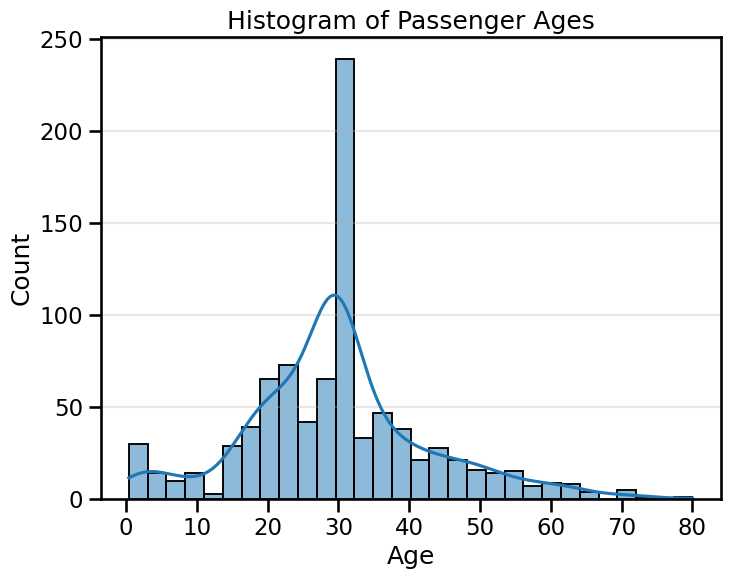

In [28]:
# Task 7: Visualizations

# Histogram of passenger ages
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()



- **Age**
  - The age distribution is broad; the histogram and boxplots show both children and older adults. Boxplots by class/sex suggest some age differences between classes (e.g., First class tends to include older passengers too).


/tmp/ipython-input-2488254273.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = df.groupby('PclassCategory')['Survived'].mean().sort_index()


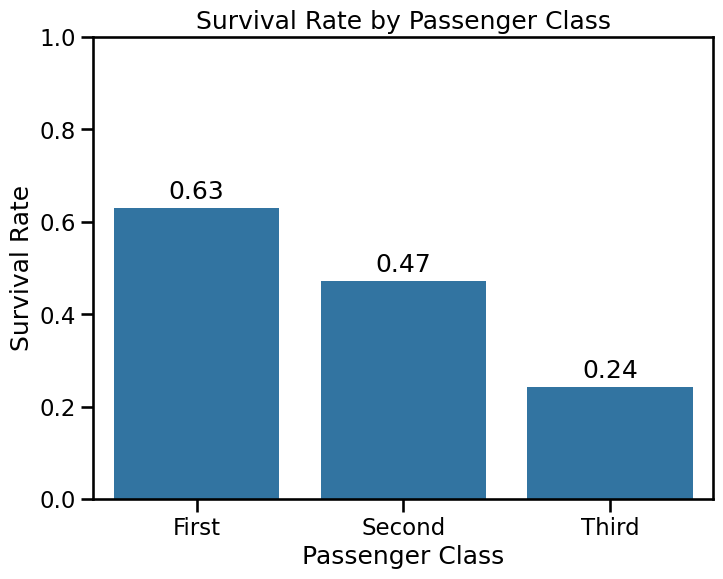

In [29]:
# Bar plot of survival rates by passenger class
plt.figure(figsize=(8,6))
survival_by_class = df.groupby('PclassCategory')['Survived'].mean().sort_index()
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0,1)
for i, v in enumerate(survival_by_class.values):
    plt.text(i, v+0.02, f"{v:.2f}", ha='center')
plt.show()






### Survival Rate by Passenger Class

- The bar plot shows that survival rates were highest in first class and lowest in third class. This reflects the impact of socioeconomic status on access to safety during the disaster.

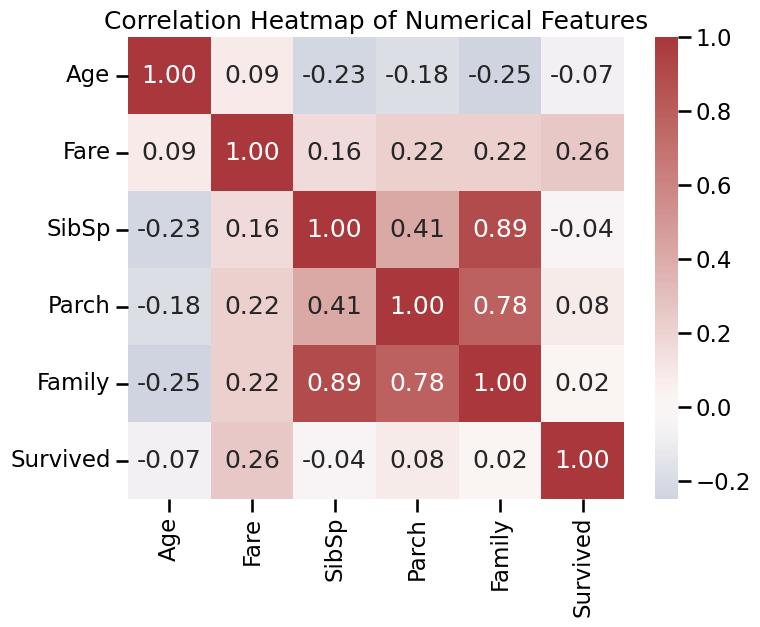

In [31]:
# Heatmap of correlation between numerical features
plt.figure(figsize=(8,6))
num_cols = ['Age','Fare','SibSp','Parch','Family','Survived']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- **Correlations**
  - Correlation heatmap shows:
    - Positive correlation between `Family` and `SibSp`/`Parch` (as expected).
    - Weak direct correlation between `Fare` and `Survived`, but other factors (sex, class, age) are more informative.


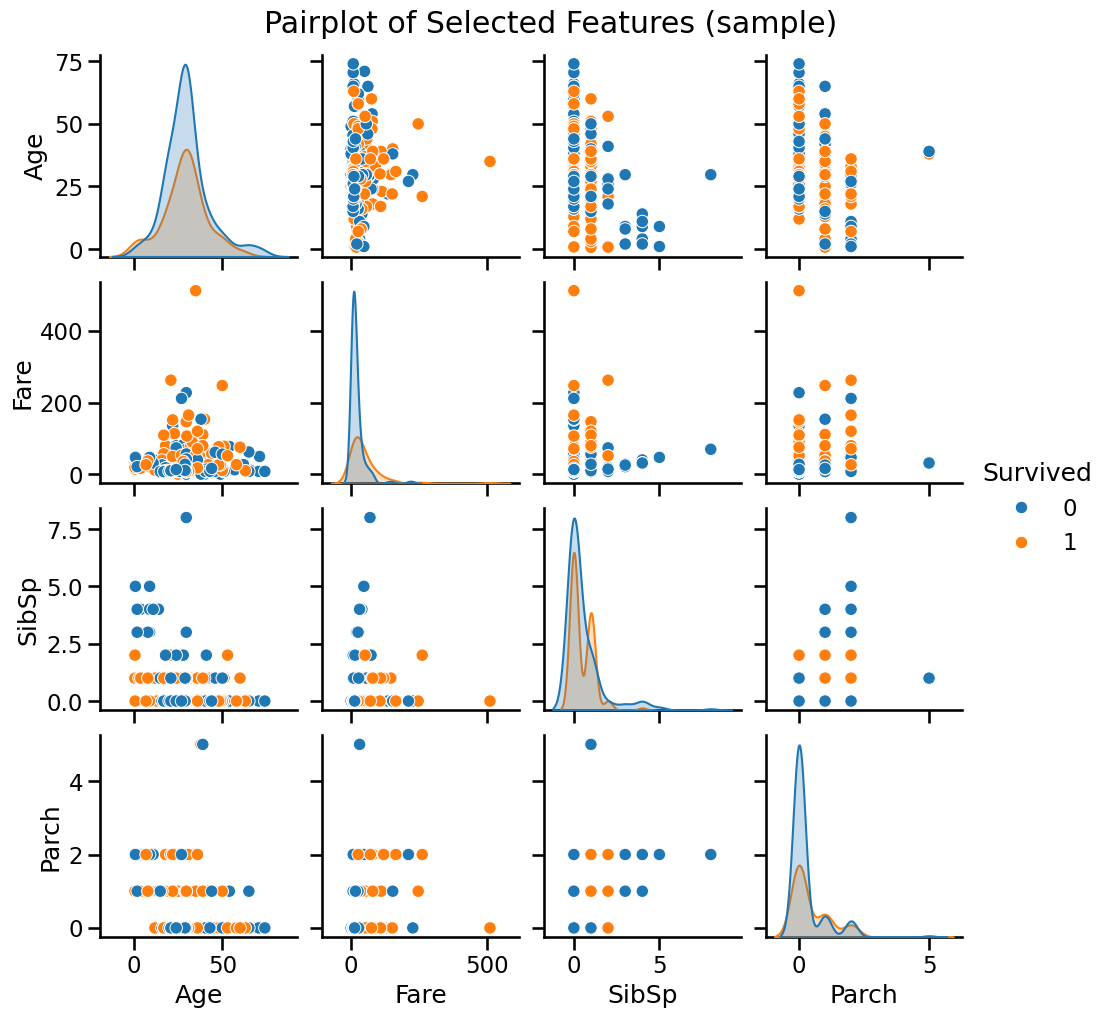

In [32]:
# Pair plot of 'Age', 'Fare', 'SibSp', and 'Parch', colored by 'Survived'
sns.pairplot(df[['Age','Fare','SibSp','Parch','Survived']].sample(min(300, len(df))),
             hue='Survived', diag_kind='kde', corner=False)
plt.suptitle("Pairplot of Selected Features (sample)", y=1.02)
plt.show()

###  Pairplot of Selected Features

- The pairplot reveals relationships between age, fare, and family-related features (SibSp, Parch) with survival. Survivors tend to have paid higher fares and traveled with fewer family members. Distinct clusters suggest class and family size influenced survival outcomes.

In [33]:
# Task 8: Analyze survival rates

# Survival rates by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean().sort_values(ascending=False)
print("Survival rate by sex:")
display(survival_by_sex)

# Survival rates by passenger class
survival_by_class = df.groupby('PclassCategory')['Survived'].mean().sort_values(ascending=False)
print("\nSurvival rate by passenger class:")
display(survival_by_class)

# A small combined table
print("\nSurvival rate by Sex and PclassCategory:")
combined = df.groupby(['Sex','PclassCategory'])['Survived'].mean().unstack()
display(combined.round(3))


Survival rate by sex:


,Survived
Sex,
female,0.742038
male,0.188908



Survival rate by passenger class:


/tmp/ipython-input-4097718807.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = df.groupby('PclassCategory')['Survived'].mean().sort_values(ascending=False)


,Survived
PclassCategory,
First,0.629630
Second,0.472826
Third,0.242363



Survival rate by Sex and PclassCategory:


/tmp/ipython-input-4097718807.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined = df.groupby(['Sex','PclassCategory'])['Survived'].mean().unstack()


PclassCategory,First,Second,Third
Sex,,,
female,0.968,0.921,0.500
male,0.369,0.157,0.135


**Survival Rate Summary**

 -**By Sex:** Females had a much higher survival rate than males.

 -**By Class:** First-class passengers survived more often than those in second or third class.

**-Combined**: Female passengers in first class had the highest survival rate; males in third class had the lowest


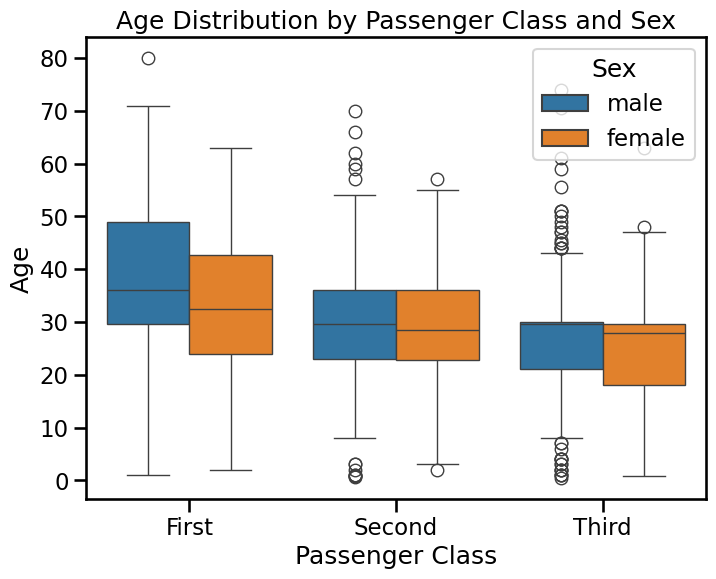

In [34]:
# Task 9: Analyze age distribution

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='PclassCategory', y='Age', hue='Sex')
plt.title('Age Distribution by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Sex', loc='upper right')
plt.show()


**Age Distribution by Class and Sex**

- The box plot shows that first-class passengers tended to be older, while third-class passengers included more young individuals. Across all classes, females had slightly lower age medians than males. This highlights age and gender differences in ticket class distribution.

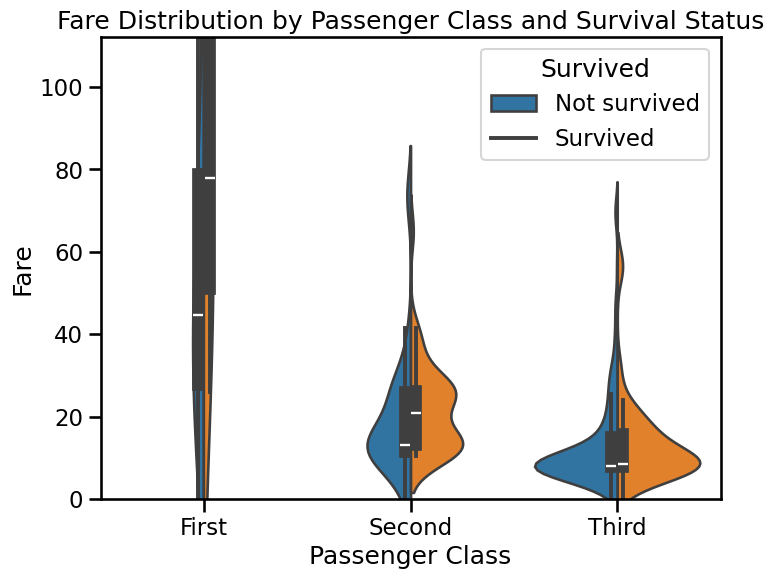

In [35]:
# Task 10: Analyze fare distribution

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='PclassCategory', y='Fare', hue='Survived', split=True)
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.ylim(0, df['Fare'].quantile(0.95))  # limit to 95th percentile for readability
plt.legend(title='Survived', labels=['Not survived','Survived'])
plt.show()


- **Fare**
  - Fare distribution is highly skewed. The violin plot limited at the 95th percentile reveals differences in fare by class and suggests survivors tended to be from higher fare brackets (visual trend).


- **Notes on improvements**
  - Handle missing `Cabin` better (e.g., treat as separate category, or use external deck mapping).
  - Try median or model-based imputation for `Age`, or create an "AgeMissing" flag to capture information in missingness.
  - Build classification models (logistic regression, tree-based) to quantify feature importance and test predictive power.
